In [1]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import util as u

Text(0.5, 1.0, 'curvature')

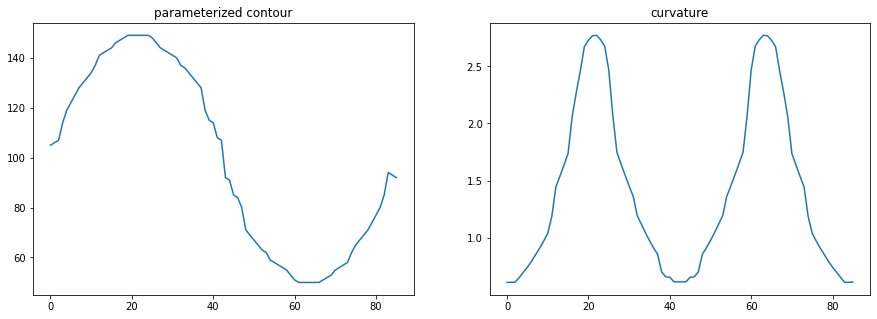

In [27]:
surface1 = u.parabloid((200,200), xrad = 0.5, yrad = 0.3, top = -0.1)

#compute curvature
s=u.mean_curvature(surface1, step=(1/400))

#------Just some stuff to generate an oriented plot w/ curvature along each point of contour-------#
#find zero level set indeces
indeces = list(zip(*np.where(abs(surface1)<0.008)))
o = u.organize(indeces)
ks = [s[item] for item in o]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))
ax1.plot([i[1] for i in o])
ax1.set_title('parameterized contour')
#ax2.set_ylim(0,0.002)
ax2.plot(ks)
ax2.set_title('curvature')

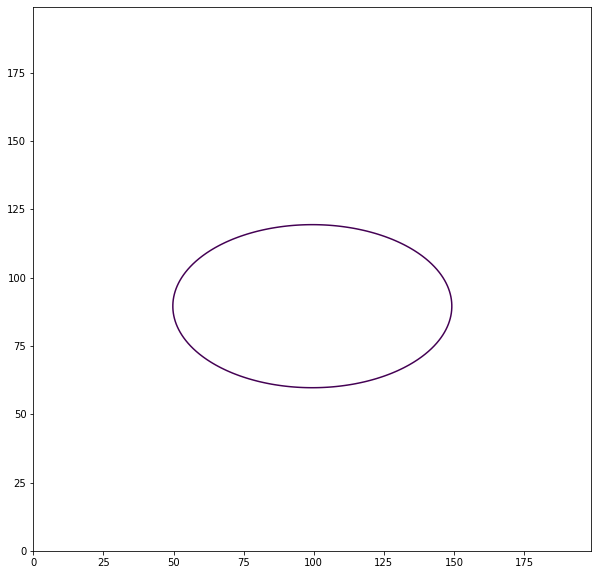

In [28]:
u.showsurf(surface1, ls=True)

In [29]:
def iteration(surface, dt=0.001, alpha = 1, step=1):
    d = lambda x,y: (x**2 + y**2)**0.5
    
    #add dat gradient param for consistency? Dont really need but hey 
    sy, sx = np.gradient(surface, np.linspace(-1, 1, surface.shape[0]), np.linspace(-1, 1, surface.shape[1]))
    K = u.mean_curvature(surface, step)

    surface = surface - alpha*K*d(sx,sy)*dt
        
    return surface


3.9609248638153076


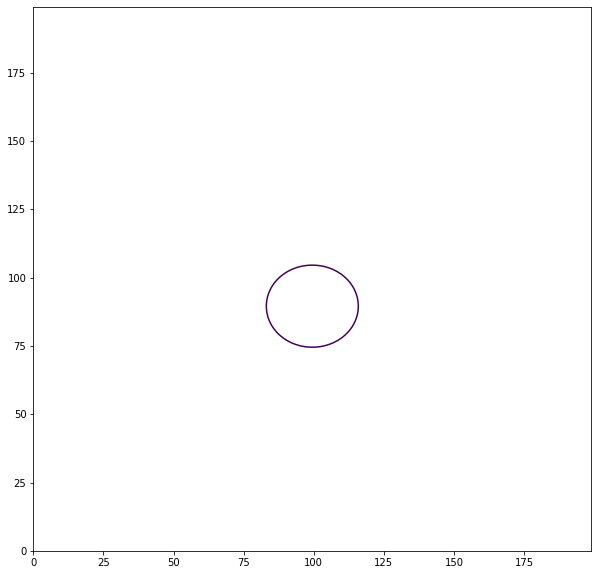

In [40]:
#run a sample iteration using a parabloid as initial surface 

g1 = surface1

#note i'm using an alpha thats ad hoc, step was computed using grid mesh size from parabloid def
import time 
start = time.time()
for i in range(1250):
    g1 = iteration(g1, dt=0.0001,step=(2/199))
stop = time.time()

u.showsurf(g1, ls=True)
print(stop-start)

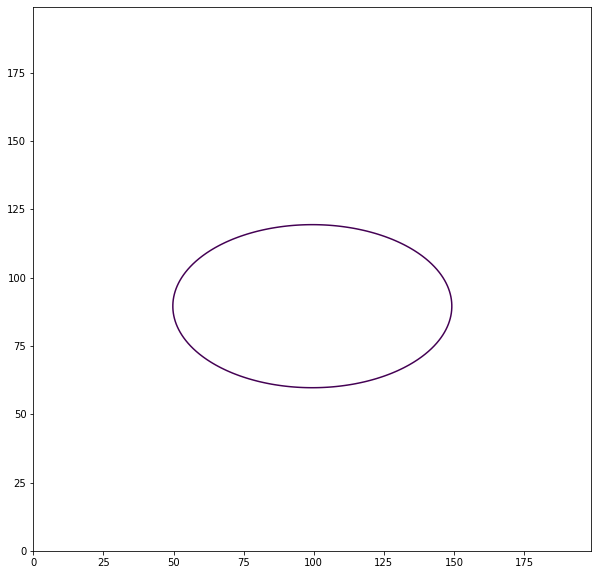

In [41]:
#notice how iterate is converging inwards, here's the original for reference 
u.showsurf(surface1, ls=True)

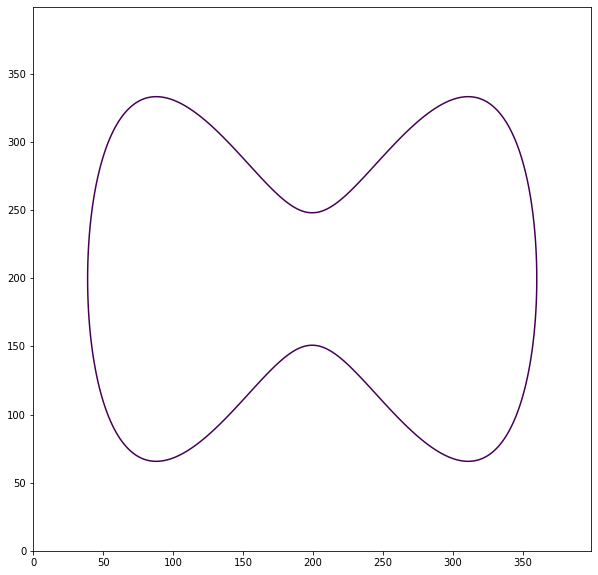

In [10]:
#now try with an hourglass looking thing, not using u.parabloid function since this is a tad more complicated a surface
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)
xx, yy = np.meshgrid(x,y)
surface2 = -((xx+0.5)*(xx+1.5)*(xx-0.5)*(xx-1.5)+yy**2)+0.8

u.showsurf(surface2, ls=True)

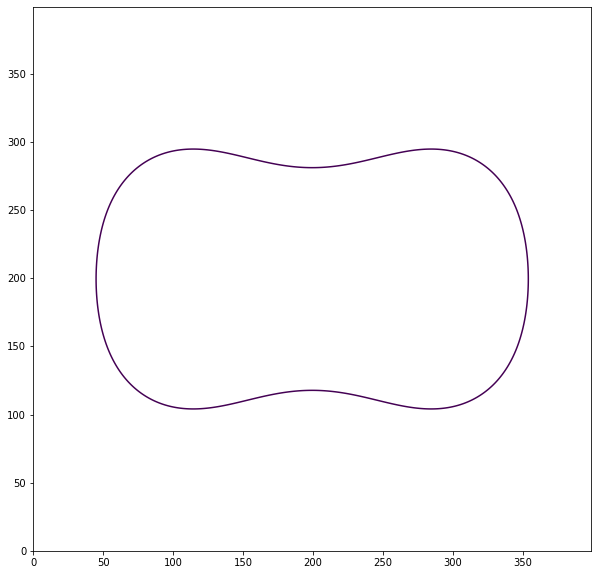

In [19]:
g2 = surface2

for i in range(3000):
    g2 = iteration(g2, dt=0.00003, alpha=1, step=0.01)
    
u.showsurf(g2, ls=True)

In [ ]:
#convention: DEFINE SAMPLE PARABLOID ON [-1,1]x[-1,1] 